# Introduction

Neural Network is yet another machine learning algorithm which tries to somewhat mimic the human brain and how it functions. It uses something called 'artificial neurons' to create a network which takes multiple inputs and generates some outputs based on evaluation of the interconnected network.

#### Neuron

Consider the neuron as a node which has many inputs lines and one output lines. The input lines usually have weights associated with it which helps to prefer certain inputs over others. The node usually has some activation function which activates the output line based on some criteria. Activation functions can be linear or non-linear. Input to the activation function is the weighted sum of the inputs ( usually also contains a bias term with the weighted sum). So, for input $X$, weights $W$, bias $b$ and activation function $F(.)$, output of a neuron ($a$) would be:
$$a = F(\vec{W} \cdot \vec{X} + b)$$

#### Forward Propagation and Back Propagation

Forward propagation is the process of evaluating the output given the input signals. This involves propagating the inputs as per the weights of the connecting lines across the multi-layered network.

Back Propagation is the learning process where the error between the evaluated output and the actual observed output ( target ) is calculated and then the weights of the connecting lines are tweaked by propagating the error backwards. This in a sense tries to evaluate how the weights actually affect the generated output and what should be the probable change in weights to match the output as expected.

This one iteration of forward and backward propagation is called an epoch. Several such epochs on the training samples would lead to a learned neural network.

#### Building the model

For building the model, we need to decide a couple of things. First, we observe that dimension of the input vector decides the number of neurons in the input layer. Similarly, the dimension of the output target decided the number of neurons in the output layer. In between, we can have any number of hidden layers consisting of any number of neurons. For each neuron, we need to decide the activation function to use. For hidden layers, we usually use some non-linear activation functions like ReLu, tanh or sigmoid. For the output layer, if the objective is to predict some class, we use a softmax activation function ( has the property of generating probability distribution from numbers ).

#### Training of Neural Networks

For training the neural networks during the back propagation, we use the very famous "Gradient Descent" ( discussed <a href="https://github.com/soumyasanyal/machinelearning/blob/master/Regression/Gradient%20Descent.ipynb">here</a> ). We will discuss this for a specific case where we have 2 input signals, one hidden layer, and 2 output signals. For hidden layer we use the tanh activation function and for output layer we use the softmax activation function.

Forward propagation for input $X$:
$$z_1 = X.W_1 + b_1$$
$$a_1 = tanh(z_1)$$
$$z_2 = a_1.W_2 + b_2$$
$$a_2 = softmax(z_2)$$

For backward propagation, some mathematics is involved ( will fill this later using the <a href="https://www.youtube.com/watch?v=tIeHLnjs5U8">detailed Video</a> ).

# ANN in python

We will implement a rudimentary NN with one hidden layer. The hidden layer has tanh activation and the output layer has softmax activation. Complete motivation of this implementation is derieved from <a href="http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/">this</a> blog.

In [58]:
import numpy as np

# input_size:    Dimension of input vector
# output_size:   Dimension of target vector
# hidden_size:   Number of neurons in hidden layer
# epochs:        Number of iterations of learning to be done
# alpha:         Learning rate
# reg_lambda:    Regularization factor
# print_loss:    Flag to print the loss after some fixed iterations
class NeuralNetwork:
    def __init__(self, input_size, output_size, hidden_size, epochs=20000, alpha=0.01, reg_lambda=0.01, print_loss=True):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.epochs = epochs
        self.alpha = alpha
        self.reg_lambda = reg_lambda
        self.print_loss = print_loss
        self.w1 = self.b1 = self.w2 = self.b2 = []
    
    def __forward(self, x):
        w1, b1, w2, b2 = self.w1, self.b1, self.w2, self.b2
        z1 = x.dot(w1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(w2) + b2
        exp_vals = np.exp(z2)
        softmax_vals = exp_vals / np.sum(exp_vals, axis=1, keepdims=True)
        return softmax_vals
    
    def predict(self, x):
        softmax_vals = self.__forward(x)
        return np.argmax(softmax_vals, axis=1)
    
    def __loss(self, X):
        softmax_vals = self.__forward(X)
        num_samples = len(X)
        correct_logprobs = -np.log(softmax_vals[range(num_samples), y])
        data_loss = np.sum(correct_logprobs)
        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda/2 * (np.sum(np.square(self.w1)) + np.sum(np.square(self.w2)))
        return 1./num_samples * data_loss
    
    def fit(self, X, y):
        num_samples = len(X)
        # Initialize the parameters
        np.random.seed(0)
        self.w1 = np.random.randn(self.input_size, self.hidden_size) / np.sqrt(self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.w2 = np.random.randn(self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)
        self.b2 = np.zeros((1, self.output_size))
        
        for idx in range(self.epochs):
            softmax_vals = self.__forward(X)
            
            #back propagation
            delta3 = softmax_vals
            delta3[range(num_samples), y] -= 1
            z1 = X.dot(self.w1) + self.b1
            a1 = np.tanh(z1)
            delta2 = delta3.dot(self.w2.T)*(1 - np.power(a1, 2))
            dlw2 = (a1.T).dot(delta3)
            dlb2 = np.sum(delta3, axis=0, keepdims=True)
            dlw1 = (X.T).dot(delta2)
            dlb1 = np.sum(delta2, axis=0)
            
            # regularization terms
            dlw1 += self.reg_lambda * self.w1
            dlw2 += self.reg_lambda * self.w2
            
            # Gradient descent parameter update
            self.w1 += -self.alpha * dlw1
            self.b1 += -self.alpha * dlb1
            self.w2 += -self.alpha * dlw2
            self.b2 += -self.alpha * dlb2
            
            if self.print_loss and idx % 1000 == 0:
                print("Loss after iteration %d: %f" %(idx, self.__loss(X)))


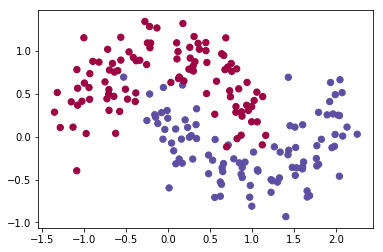

With 3 nodes in hidden layer:
Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068934
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


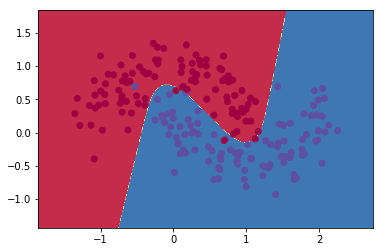

With 5 nodes in hidden layer:
Loss after iteration 0: 0.613897
Loss after iteration 1000: 0.053880
Loss after iteration 2000: 0.044053
Loss after iteration 3000: 0.041367
Loss after iteration 4000: 0.040268
Loss after iteration 5000: 0.039732
Loss after iteration 6000: 0.039444
Loss after iteration 7000: 0.039280
Loss after iteration 8000: 0.039185
Loss after iteration 9000: 0.039128
Loss after iteration 10000: 0.039093
Loss after iteration 11000: 0.039072
Loss after iteration 12000: 0.039059
Loss after iteration 13000: 0.039050
Loss after iteration 14000: 0.039045
Loss after iteration 15000: 0.039042
Loss after iteration 16000: 0.039040
Loss after iteration 17000: 0.039038
Loss after iteration 18000: 0.039038
Loss after iteration 19000: 0.039037


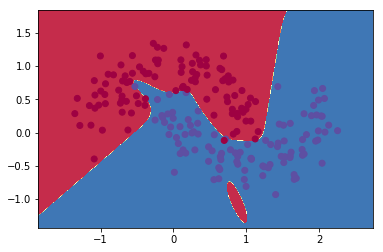

In [62]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

nn3 = NeuralNetwork(input_size=2, output_size=2, hidden_size=3)
print("With 3 nodes in hidden layer:")
nn3.fit(X, y)
plot_decision_boundary(lambda x: nn3.predict(x))

nn5 = NeuralNetwork(input_size=2, output_size=2, hidden_size=5)
print("With 5 nodes in hidden layer:")
nn5.fit(X, y)
plot_decision_boundary(lambda x: nn5.predict(x))